In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('engine_data.csv')

In [5]:
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the result
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64


In [7]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB
None


In [8]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  Engine Condition  
count  19535.000000  19535.000000      19535.000000  
mean      77.643420     78.427433          0.630509  
std        3.110984      6.206749          0.482679  
min       71.321974     61.673325          0.000000  
25%       75.725990     73.895421         

In [9]:
# Check for unique values in the target variable
print("\nUnique Values in 'Engine Condition':")
print(df['Engine Condition'].value_counts())


Unique Values in 'Engine Condition':
Engine Condition
1    12317
0     7218
Name: count, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

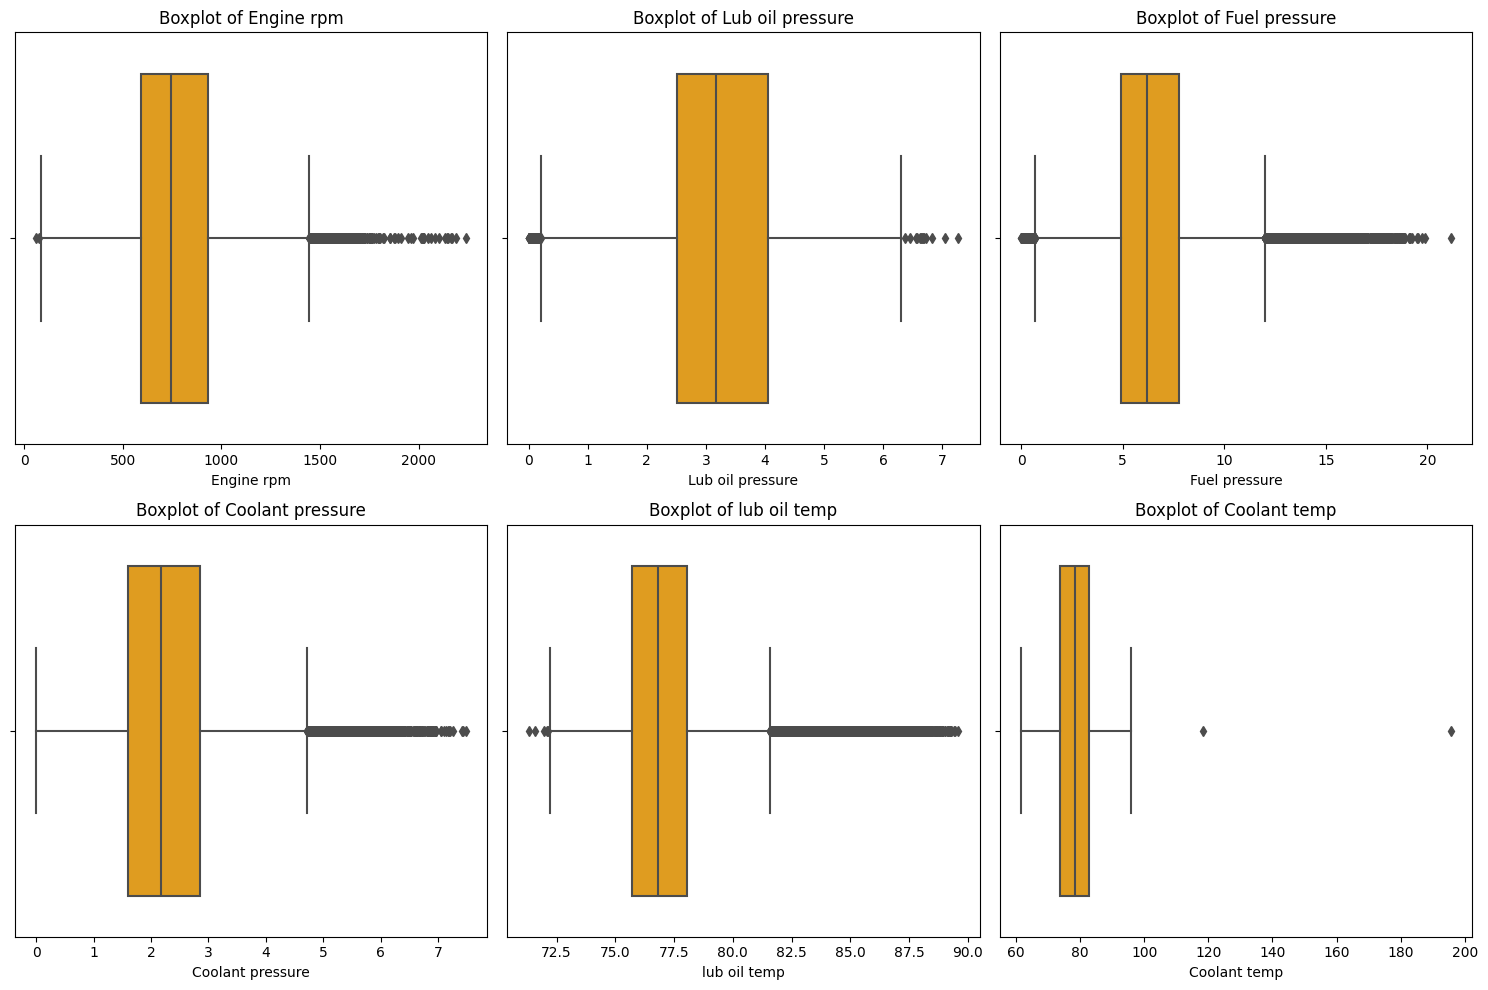

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical features from your dataframe
numerical_features = df.columns[:-1]

# Set the number of rows and columns for the grid
rows = len(numerical_features) // 3 + (len(numerical_features) % 3 > 0)
cols = 3

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop over each feature and plot its boxplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], color='orange', ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot to a single sheet (figure)
plt.savefig('boxplots.png')

# Display the plots
plt.show()


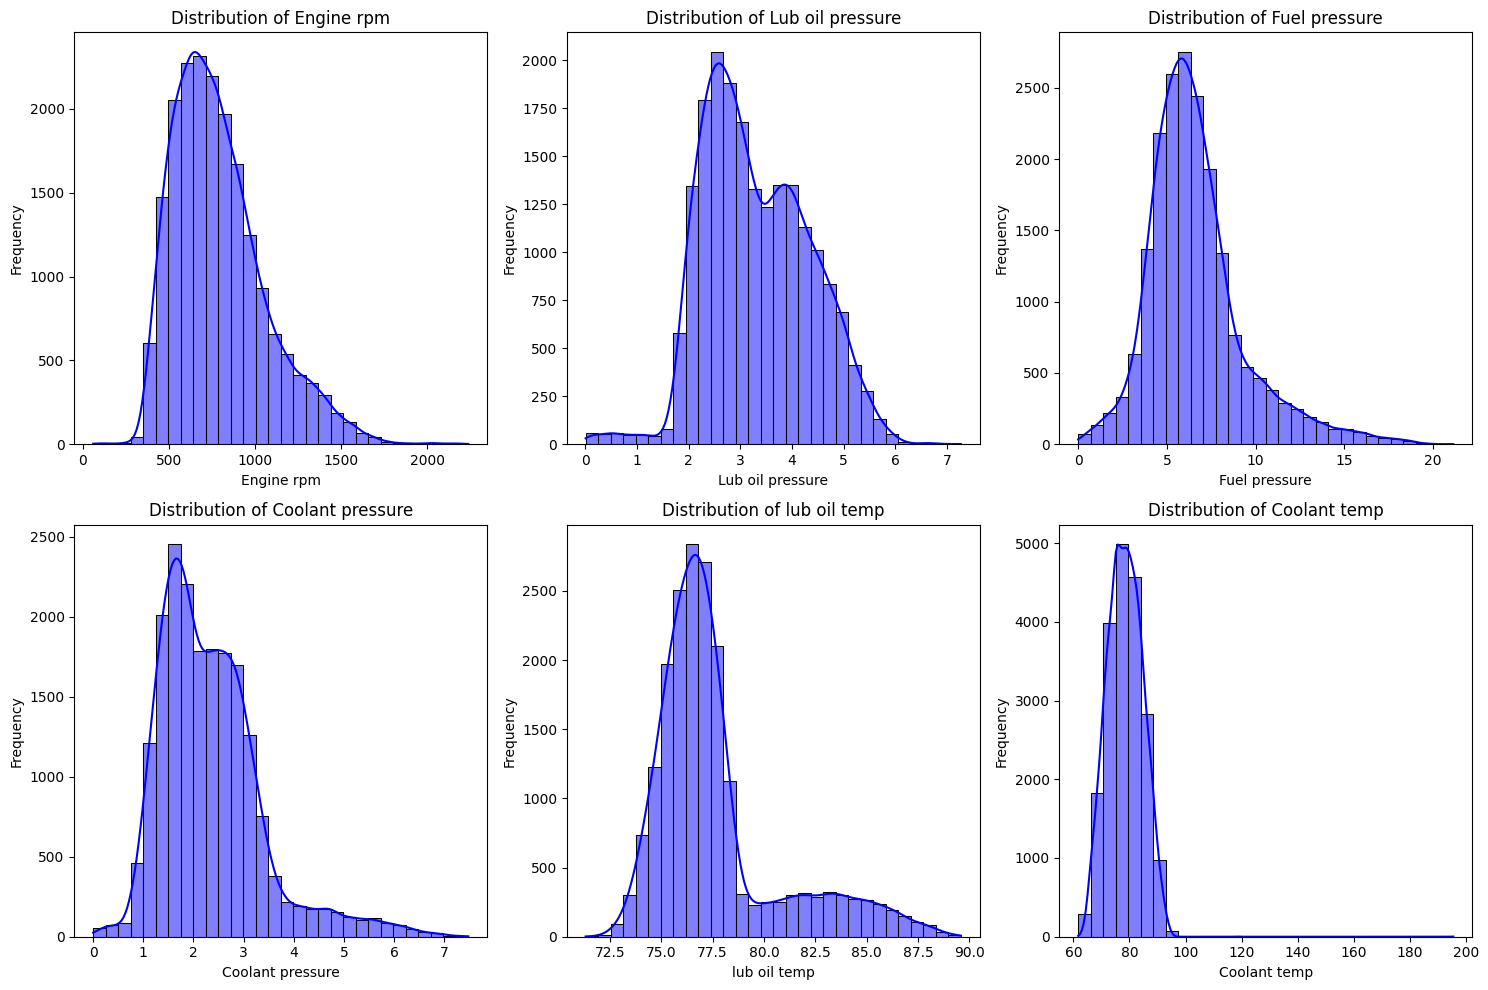

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical features (excluding the target variable)
numerical_features = df.columns[:-1]  # Exclude 'Engine Condition'

# Set the number of rows and columns for the grid
rows = len(numerical_features) // 3 + (len(numerical_features) % 3 > 0)
cols = 3

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop over each feature and plot its distribution
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot to a single sheet (figure)
plt.savefig('distributions.png')

# Display the plots
plt.show()

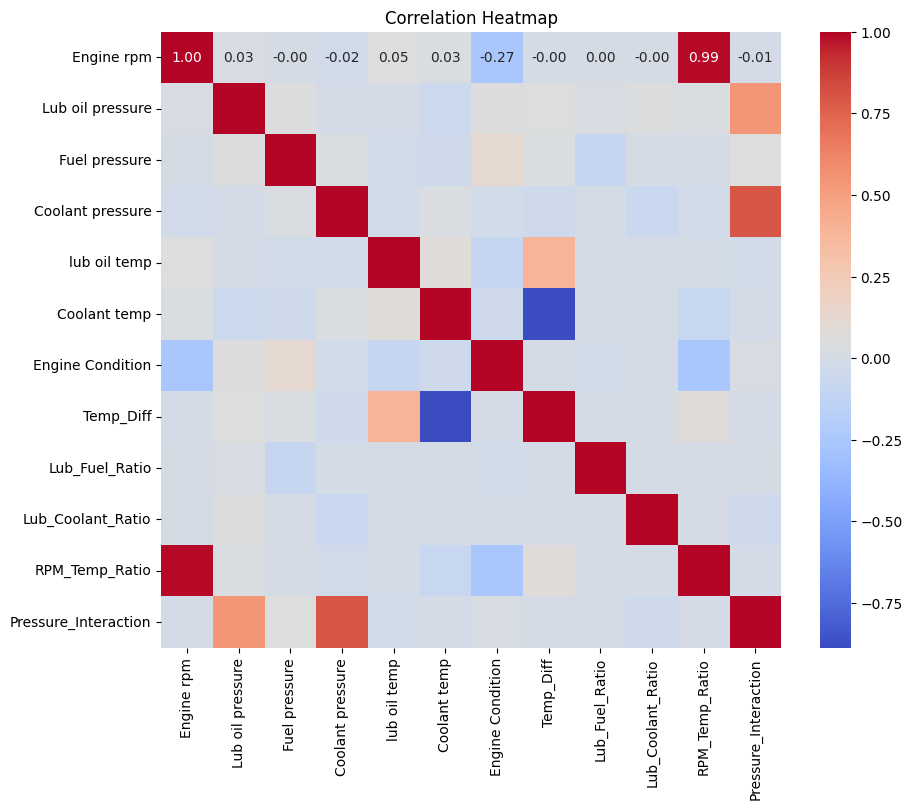

In [32]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

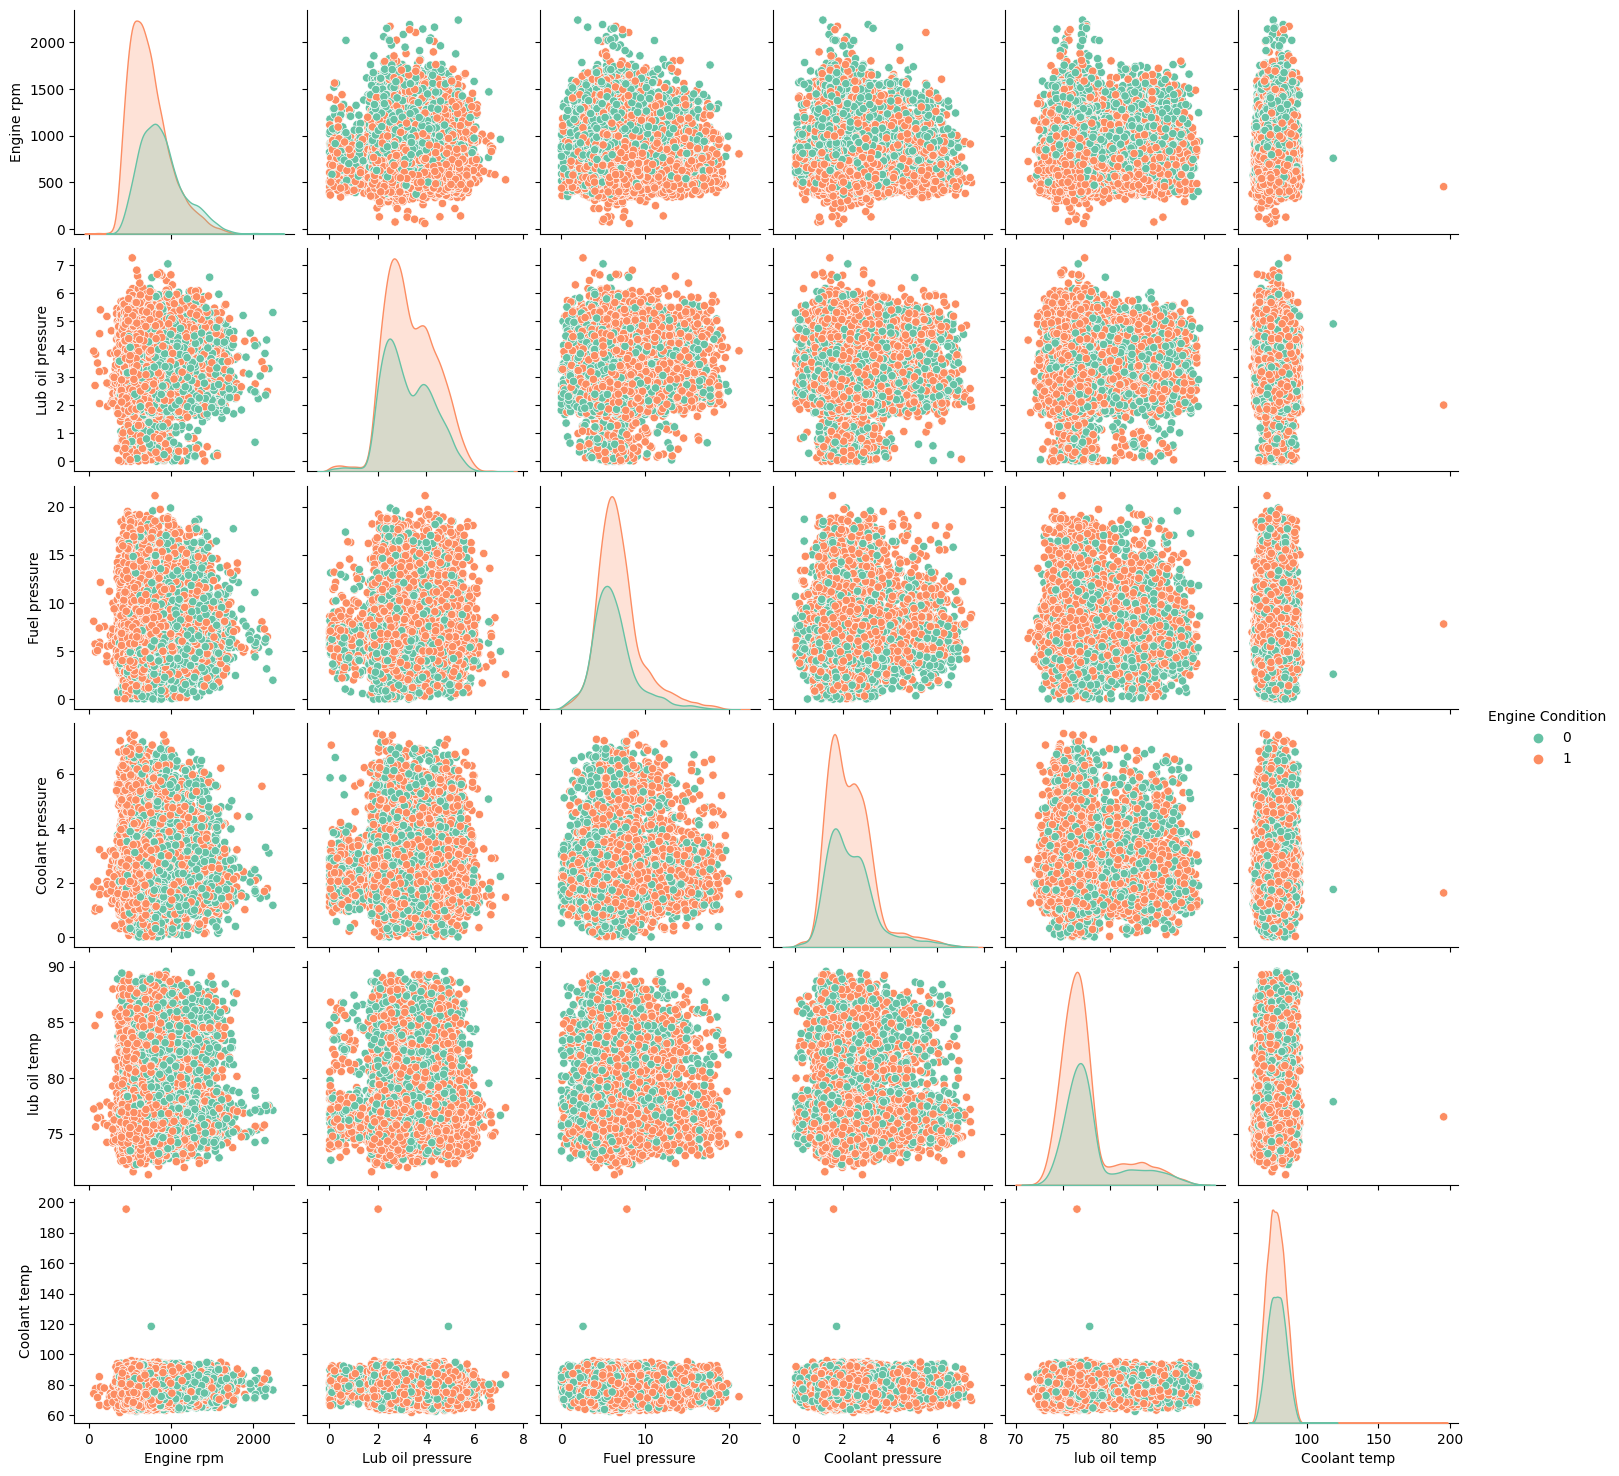

In [14]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Engine Condition', diag_kind='kde', palette='Set2')
plt.show()

### Feature Engineering

Temperature Difference: The difference between 'Lub oil temp' and 'Coolant temp' may capture useful patterns.

In [15]:
df['Temp_Diff'] = df['lub oil temp'] - df['Coolant temp']

Pressure Ratios: Ratios like 'Lub oil pressure' to 'Fuel pressure' or 'Coolant pressure' can highlight relationships.

In [16]:
df['Lub_Fuel_Ratio'] = df['Lub oil pressure'] / df['Fuel pressure']
df['Lub_Coolant_Ratio'] = df['Lub oil pressure'] / df['Coolant pressure']

RPM to Temperature Ratio: A measure of how engine speed relates to average temperature.

In [17]:
df['RPM_Temp_Ratio'] = df['Engine rpm'] / ((df['lub oil temp'] + df['Coolant temp']) / 2)

Combine existing features to capture interaction effects:

In [18]:
df['Pressure_Interaction'] = df['Lub oil pressure'] * df['Coolant pressure']

In [19]:
# Convert 'Engine Condition' to a categorical variable
df['Engine Condition'] = df['Engine Condition'].astype('category')

### Modeling

In [20]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('Engine Condition', axis=1)
y = df['Engine Condition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Selection

Choose a few classification models for comparison:

    Logistic Regression: A baseline model.
    Random Forest: For feature importance and non-linear patterns.
    XGBoost or LightGBM: For boosting performance.

In [21]:
# Create a dictionary to store the performance metrics for each model
models_performance = {}

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

Baseline Model: Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

models_performance['Logistic Regression'] = {
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1-Score': lr_f1
}

Logistic Regression Accuracy: 0.6513949321730228
              precision    recall  f1-score   support

           0       0.57      0.27      0.37      1459
           1       0.67      0.88      0.76      2448

    accuracy                           0.65      3907
   macro avg       0.62      0.58      0.56      3907
weighted avg       0.63      0.65      0.61      3907



Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

models_performance['Random Forest'] = {
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1
}

Random Forest Accuracy: 0.6388533401586896
              precision    recall  f1-score   support

           0       0.52      0.39      0.45      1459
           1       0.68      0.79      0.73      2448

    accuracy                           0.64      3907
   macro avg       0.60      0.59      0.59      3907
weighted avg       0.62      0.64      0.63      3907



 Gradient Boosting (XGBoost)

In [25]:
from xgboost import XGBClassifier

# Initialize and train
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb, average='weighted')
xgb_recall = recall_score(y_test, y_pred_xgb, average='weighted')
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')

models_performance['XGBoost'] = {
    'Accuracy': xgb_accuracy,
    'Precision': xgb_precision,
    'Recall': xgb_recall,
    'F1-Score': xgb_f1
}


XGBoost Accuracy: 0.6444842590222677
              precision    recall  f1-score   support

           0       0.53      0.40      0.46      1459
           1       0.69      0.79      0.74      2448

    accuracy                           0.64      3907
   macro avg       0.61      0.60      0.60      3907
weighted avg       0.63      0.64      0.63      3907



Feature Importance

Analyze feature importance for tree-based models:

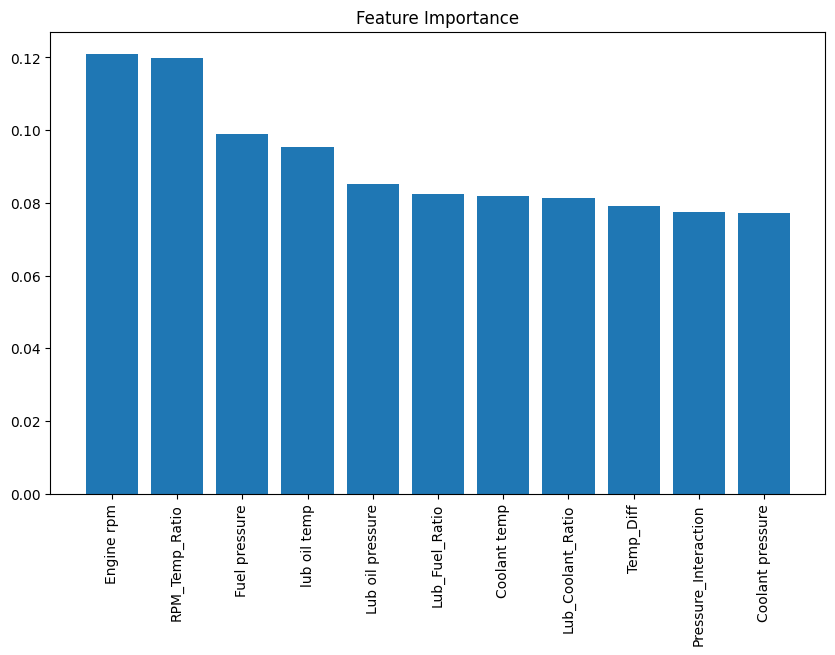

In [26]:
import matplotlib.pyplot as plt
import numpy as np
# Feature importance for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

In [27]:
performance_df = pd.DataFrame(models_performance).T
print(performance_df)

                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.651395   0.631958  0.651395  0.613595
Random Forest        0.638853   0.623349  0.638853  0.625072
XGBoost              0.644484   0.630264  0.644484  0.631975


In [28]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Hyperparameters for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate
    'max_depth': [3, 6, 10],  # Depth of the tree
    'subsample': [0.7, 0.8, 1.0],  # Proportion of data used for each tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # Proportion of features used for each tree
}

# Initialize GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42), xgb_param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search
xgb_grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)

# Retrain the XGBoost model with the best parameters
xgb_best_model = xgb_grid_search.best_estimator_
xgb_best_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb_best = xgb_best_model.predict(X_test)

# Evaluate the best model
from sklearn.metrics import accuracy_score, classification_report

print("XGBoost (Tuned) Accuracy:", accuracy_score(y_test, y_pred_xgb_best))
print(classification_report(y_test, y_pred_xgb_best))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
XGBoost (Tuned) Accuracy: 0.6613770156130023
              precision    recall  f1-score   support

           0       0.57      0.37      0.45      1459
           1       0.69      0.84      0.76      2448

    accuracy                           0.66      3907
   macro avg       0.63      0.60      0.60      3907
weighted avg       0.65      0.66      0.64      3907



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming your dataset is stored in `df`, with 'Engine Condition' as the target column
X = df.drop('Engine Condition', axis=1)
y = df['Engine Condition']

# Handle categorical columns (if any)
# Apply Label Encoding to categorical features
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = keras.Sequential()

# Input layer (input_shape should match the number of features)
model.add(layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))

# Hidden layer (you can experiment with more layers and units)
model.add(layers.Dense(64, activation='relu'))  # Hidden layer with 64 units
model.add(layers.Dropout(0.2))  # Dropout layer for regularization

# Output layer (for binary classification, use sigmoid activation)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification loss
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype("int32")  # Convert probabilities to binary classes




Epoch 1/20


489/489 [==============================] - 2s 2ms/step - loss: 0.6207 - accuracy: 0.6543 - val_loss: 0.6046 - val_accuracy: 0.6568
Epoch 2/20
489/489 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6693 - val_loss: 0.6042 - val_accuracy: 0.6568
Epoch 3/20
489/489 [==============================] - 1s 1ms/step - loss: 0.5999 - accuracy: 0.6699 - val_loss: 0.6035 - val_accuracy: 0.6568
Epoch 4/20
489/489 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6721 - val_loss: 0.6042 - val_accuracy: 0.6565
Epoch 5/20
489/489 [==============================] - 1s 1ms/step - loss: 0.5981 - accuracy: 0.6691 - val_loss: 0.6037 - val_accuracy: 0.6580
Epoch 6/20
489/489 [==============================] - 1s 1ms/step - loss: 0.5983 - accuracy: 0.6685 - val_loss: 0.6032 - val_accuracy: 0.6611
Epoch 7/20
489/489 [==============================] - 1s 1ms/step - loss: 0.5965 - accuracy: 0.6692 - val_loss: 0.6032 - val_accuracy: 0.6560
E

In [31]:
# Evaluate the model performance
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

Neural Network Accuracy: 0.6585615561812133
              precision    recall  f1-score   support

           0       0.57      0.36      0.44      1459
           1       0.69      0.83      0.75      2448

    accuracy                           0.66      3907
   macro avg       0.63      0.60      0.60      3907
weighted avg       0.64      0.66      0.64      3907



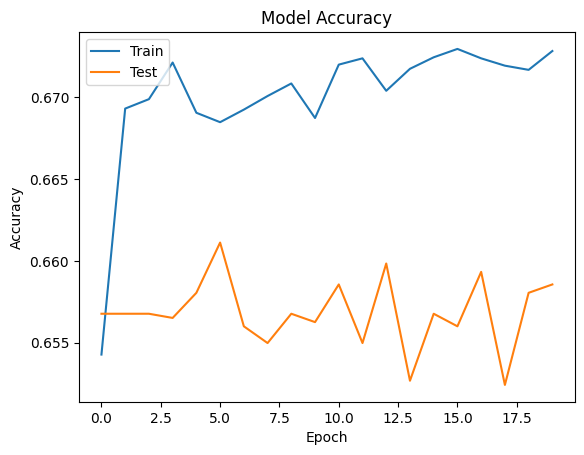

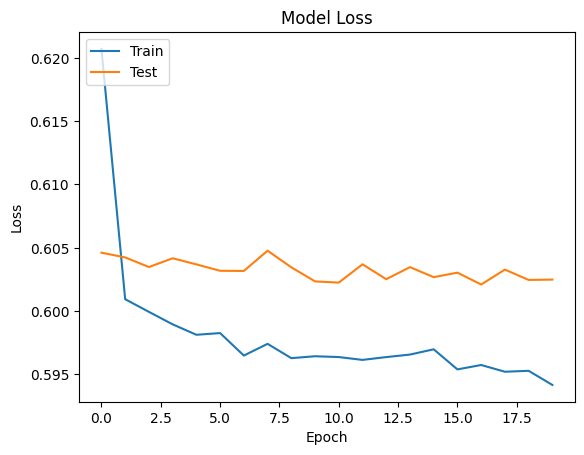

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()